In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
prices = pd.read_excel('Prices_Train.xlsx')

In [2]:
print(prices.shape)
prices.drop(columns = 'Name',inplace = True)
print(prices.columns)
print(prices.shape)

(6019, 12)
Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')
(6019, 11)


#### Replacing Year with age of car which is more comprehensible

In [3]:
prices['Age'] = 2020 - prices.Year
prices.drop(columns = 'Year',inplace = True)
prices.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,10
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,5
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,9
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,7


In [4]:
prices.isnull().sum()

Location              0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Age                   0
dtype: int64

In [5]:
prices.dropna(inplace = True)
print(prices.isnull().sum())
prices.shape

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age                  0
dtype: int64


(5975, 11)

#### Dropping all null values as they are few compared to the entire dataset

In [6]:
cols = prices.columns
for col in cols:
    print(col)
    print(prices[col].nunique())
    print(prices[col].dtype,'\n')

Location
11
object 

Kilometers_Driven
3080
int64 

Fuel_Type
4
object 

Transmission
2
object 

Owner_Type
4
object 

Mileage
442
object 

Engine
145
object 

Power
371
object 

Seats
9
float64 

Price
1369
float64 

Age
22
int64 



#### Converting Mileage to numerical data

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 5975, dtype: float64


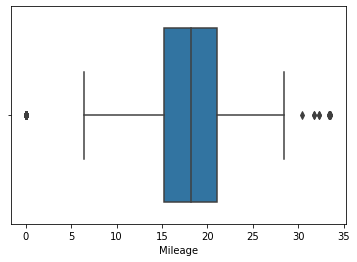

In [7]:
prices['Mileage'] = prices['Mileage'].str.replace(' km/kg','')
prices['Mileage'] = prices['Mileage'].str.replace(' kmpl','')
prices['Mileage'] = pd.to_numeric(prices['Mileage'])
print(prices['Mileage'])
sns.boxplot(prices['Mileage'])

#### Converting Engine to numerical data

0        998
1       1582
2       1199
3       1248
4       1968
        ... 
6014    1248
6015    1120
6016    2498
6017     998
6018     936
Name: Engine, Length: 5975, dtype: int64


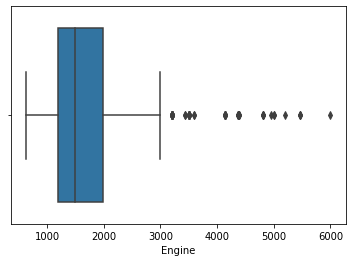

In [8]:
prices['Engine'] = prices['Engine'].str.replace('CC','')
prices['Engine'] = pd.to_numeric(prices['Engine'])
print(prices['Engine'])
sns.boxplot(prices['Engine'])

#### Converting Power to numerical data

0         58.16
1        126.20
2         88.70
3         88.76
4        140.80
         ...   
6014     740.00
6015     710.00
6016    1120.00
6017      67.10
6018      57.60
Name: Power, Length: 5975, dtype: float64


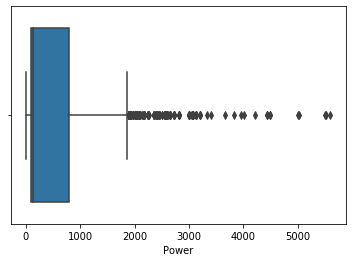

In [9]:
prices['Power'] = prices['Power'].str.replace('bhp','')
prices['Power'] = prices['Power'].str.replace('null','0')
prices['Power'] = prices['Power'].str.replace(' ','0')
prices['Power'] = pd.to_numeric(prices['Power'])
print(prices['Power'])
sns.boxplot(prices['Power'])

#### Using z scores to remove outliers 

In [10]:
import scipy.stats as stats
num_cols = ['Kilometers_Driven','Mileage','Engine','Power','Age','Price']
z_scores = stats.zscore(prices[num_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
prices = prices[filtered_entries]
num_cols.remove('Price')
prices.shape

(5663, 11)

#### Finding relations between the numerical data and the Price using scatterplots

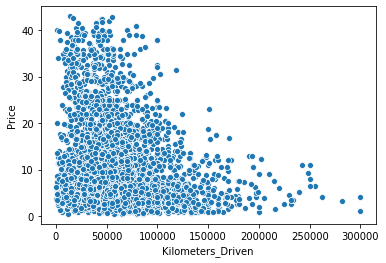

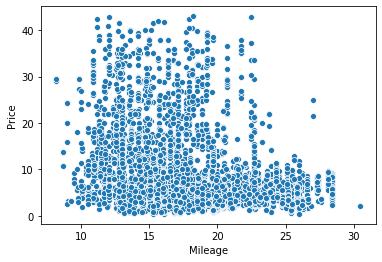

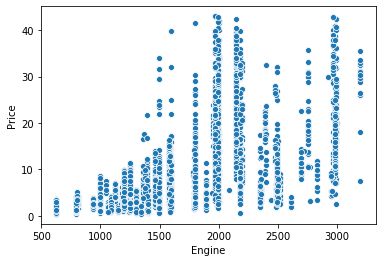

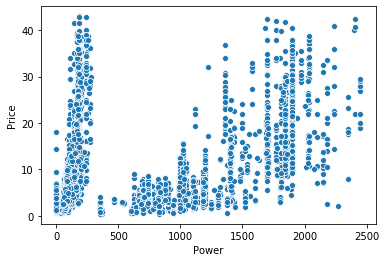

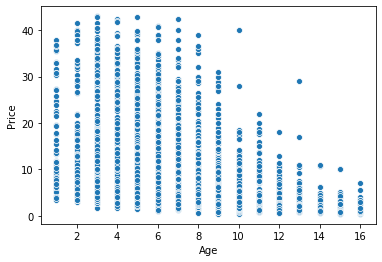

In [11]:
for col in num_cols:
    sns.scatterplot(x = prices[col],y = prices.Price)
    plt.show()

#### No concrete relation can be drawn between any of the independant numerical columns and the Price of the car 

In [12]:
cat_cols = [x for x in prices.columns if x not in num_cols]
cat_cols.remove('Price')
cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

#### Distribution of the dataset

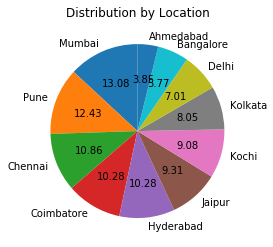

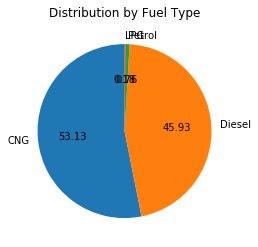

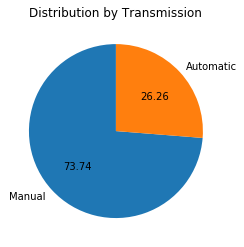

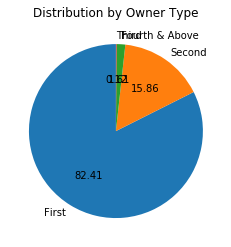

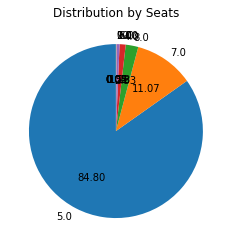

In [13]:
for col in cat_cols:
    x = prices[col].value_counts()
    plt.pie(x,labels = prices[col].unique(),startangle = 90,autopct = '%.2f')
    tit = 'Distribution by ' + col.replace('_',' ')
    plt.title(tit)
    plt.show()

#### Prices by location

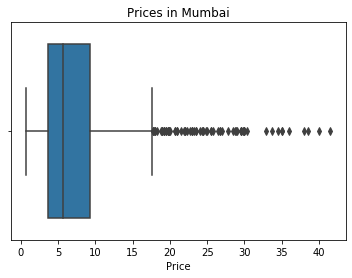

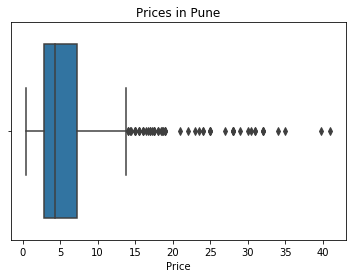

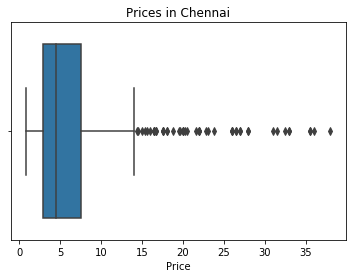

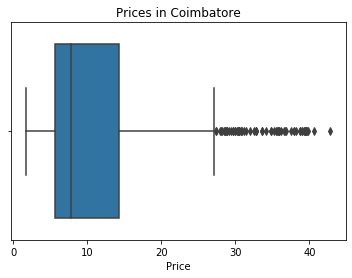

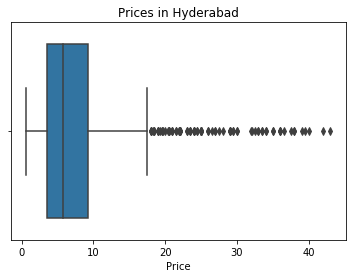

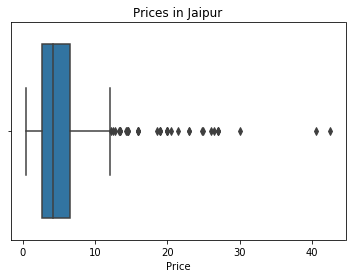

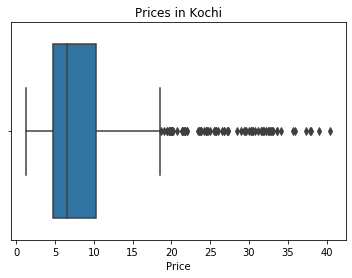

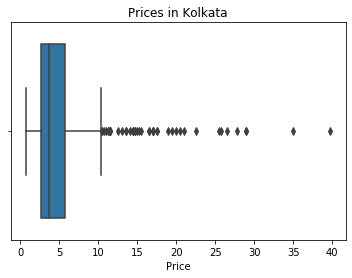

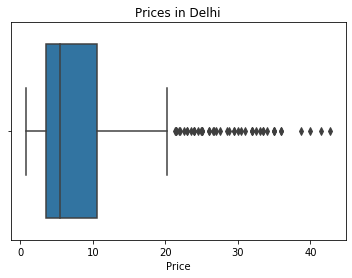

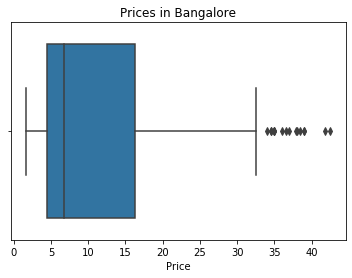

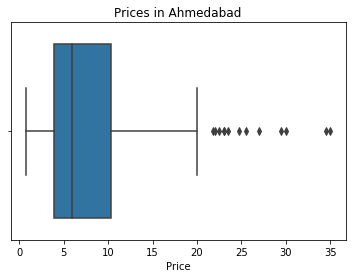

In [14]:
items = prices['Location'].unique()
for item in items:
    sns.boxplot(prices.Price.where(prices.Location == item))
    tit = 'Prices in ' + item
    plt.title(tit)
    plt.show()

#### Applying the linear regression model

In [15]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [16]:
a = pd.get_dummies(prices['Fuel_Type'])
prices[['CNG','Diesel','LPG','Petrol']] = a
df = prices.drop(columns=['Fuel_Type'])
x = prices[['Kilometers_Driven','Age','Mileage','Engine','Power','Age','CNG','Diesel','LPG','Petrol']]
y = prices['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = linear_regression.predict(x_test)

#### Comparing the predicted values with the actual values  

In [19]:
from sklearn.metrics import explained_variance_score as e_var
var = e_var(y_test,y_pred, multioutput = 'raw_values')
var 

array([0.56569502])

In [20]:
from sklearn.metrics import max_error as me
err = me(y_test,y_pred)
err

25.477909030399907

In [21]:
from sklearn.metrics import mean_absolute_error as mae
m_err = mae(y_test,y_pred)
m_err

3.15986719512365

In [22]:
from sklearn.metrics import mean_squared_error as mse
m_s_err = mse(y_test,y_pred)
m_s_err

23.545778699917474

In [23]:
from sklearn.metrics import r2_score as r2
R_score = r2(y_test,y_pred)
R_score

0.5654094446004336